# 项目：Facebook推主 WeRateDogs 的狗狗评分数据的分析

## 一 项目背景
WeRateDogs 是一个推特主，他以诙谐幽默的方式对人们的宠物狗评分。这些评分通常以 10 作为分母。但是分子则一般大于 10：11/10、12/10、13/10 等等。为什么会有这样的评分？因为 "They're good dogs Brent." WeRateDogs 拥有四百多万关注者，曾受到国际媒体的报道。

WeRateDogs 下载了他们的推特档案，通过电子邮件发送给Uda，专为本项目使用。这个档案是基本的推特数据集（包括推特 ID、时间戳、推特文本等），但是并不完整，包含了截止到 2017 年 4 月 1 日的 5000 多条推特。

项目目标：清洗 WeRateDogs 推特数据，创建有趣可靠的分析和可视化。

In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 二 数据整理
### 1 收集数据

#### 1.1 WeRateDogs 推特档案
这是已有的数据集，可以直接利用。

**数据集说明：**WeRateDogs 的推特档案包括 5000 多条推特的基本信息（但不包括所有内容）。档案中有一列是推特的文本，已经从这一列数据中提取了评分、狗的名字和“阶段”（即 doggo、floofer、pupper 和 puppo），然后从 5000 多条推特中筛选出了 2356 条包含评分的推特数据。但是提取数据并没有做好，评分不都是正确的，狗的名字和“阶段”（stage）也有不正确的。

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
len(twitter)

2356

#### 1.2 tweet_json 数据
**数据集说明：**基础的推特档案中，转发数（retweet count）和喜爱数（favorite count）是缺失的数据，可以通过推特 API 来收集到它们。但是，"任何人"只是能获取最多 3000 条最近的推特数据，只有依靠 WeRateDogs 推特档案中的推特 ID，才可以收集到所有的 5000 多条推特。

_因为我暂时没有解决 VPN 访问 Twitter API 的问题，所以直接下载“返回的 Twitter 数据”。该文件为 txt 格式，每一行为一条独立的 twitter 信息，格式为 JSON。_

In [2]:
with open('tweet_json.txt') as file:
    temp_list = []
    for line in file:
        # 将每一行json数据转为 python dict 对象，并存储在 list 中
        temp_list.append(json.loads(line))

In [6]:
with open('tweet_json.txt') as file:
    for lin in file.readlines():
        print(lin)
        print(json.loads(lin))
        break

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

In [3]:
# 将 list 对象转为 pd.DataFrame 对象
tweet_json = pd.DataFrame(temp_list)

In [4]:
tweet_json.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### 1.3 image-predictions 数据
**数据集说明：**`image-predictions.tsv`是一份表格文件（具体来说，是推特档案中的所有图像 通过一个对狗狗种类进行分类的神经网络 而得到的一份图像预测结果），该文件需要从网络获取。
对每个特征的说明：
- `tweet_id` 是推特链接的最后一部分，位于 "status/" 后面 → https://twitter.com/dog_rates/status/889531135344209921
- `jpg_url` 是预测的图像资源链接
- `img_num` 最可信的预测结果对应的图像编号 → 1 推特中的第一张图片
- `p1` 是算法对推特中图片的一号预测 → 金毛犬
- `p1_conf` 是算法的一号预测的可信度 → 95%
- `p1_dog` 是一号预测该图片是否属于“狗”（有可能是其他物种，比如熊、马等） → True 真
- `p2` 是算法对推特中图片预测的第二种可能性 → 拉布拉多犬
- `p2_conf` 是算法的二号预测的可信度 → 1%
- `p2_dog` 是二号预测该图片是否属于“狗” → True 真
- 以此类推...

In [8]:
# 从网络获得数据
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
res = requests.get(url)

In [9]:
# 将 image-predictions 保存到本地
filename = url.split('/')[-1]
with open(filename, mode='wb') as file:
    file.write(res.content)

In [10]:
# 读取数据到 pandas
image = pd.read_table(filename)

In [11]:
image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### 2 评估数据
#### 2.1 WeRateDogs 推特档案

In [12]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1158,724049859469295616,NaN,NaN,2016-04-24 01:38:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreggory. He just took a look at his s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724049859...,10,10,Kreggory,None,None,None,None
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beau. That is Beau's balloon. He takes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879008229...,13,10,Beau,None,None,None,None
639,793256262322548741,NaN,NaN,2016-11-01 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh h*ck look at this spookling right here. Fri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793256262...,12,10,None,None,None,None,None


timestamp，retweeted_status_timestamp 都为str类型；
包含转发和评论的推特，我们只需要含有图片的原始评分；
一些特征可以删除。

In [14]:
twitter.source.tolist()[:3]

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>']

source 列包含html标签。

In [15]:
# 查看分子评分
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

从以上看出，绝大多数分子评分为10左右，数据过大或者过小的数据可能存在异常，下面具体查看。

In [16]:
# 查看评分为 0 的推特的 text
twitter[twitter.rating_numerator == 0].text.tolist()

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
 "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"]

In [17]:
# 查看评分为 27 的推特的 text
twitter[twitter.rating_numerator == 27].text.tolist()

["This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]

In [18]:
# 查看分母评分
twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

为了在评分这个维度上对狗狗进行比较，需要将分母统一为10，鉴于分母不为绝大部分数据分母为10，可以将分母不为10的数据删除。

#### 2.2 tweet_json 数据

In [19]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

时间特征 created_at 是str类型；id特征名称跟`twitter`表的tweet_id名称不一致；含有转发和评论的数据。

#### 2.3 mage-predictions 数据

In [20]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


`image`表中 有3个狗狗品种预测，可以删除两个预测。

### 2.4 问题汇总
#### 质量问题：
1. `twitter`表中 timestamp，retweeted_status_timestamp 都为str类型
2. `twitter`表中包含转发和评论的推特，我们只需要含有图片的原始评分
3. `twitter`表中 source 列包含html标签
4. `twitter`表中 text 列分子为小数形式的评分提取错误
5. `twitter`表中有一些推特没有包含狗狗照片，需要结合 image-predictions 数据进行过滤
6. `twitter`表中少量数据分母不为10，为了在评分这个维度上对狗狗进行比较，需要将分母统一为10，鉴于分母不为绝大部分数据分母为10，可以将分母不为10的数据删除。
7. `tweet_json`表中时间特征 created_at 是str类型
8. `tweet_json`表中id特征名称跟`twitter`表不一致
9. `tweet_json`表中含有转发和评论的数据


#### 结构问题：
1. `twitter`表中一些特征可以删除
2. `twitter`表中doggo，floofer，pupper，puppo应该作为变量，而非特征
3. `tweet_json`表中有大量特征，我们只需要favorite_count，retweet_count
4. `image`表中 有3个狗狗品种预测，可以删除两个预测

### 3 清理数据

In [21]:
twitter_clean = twitter.copy()

In [22]:
tweet_json_clean = tweet_json.copy()

In [23]:
image_clean = image.copy()

#### 3.1 twitter表中 timestamp，retweeted_status_timestamp 都为str类型
解决：将它们转为datetime类型（并且只保留2017年8月2日以前的数据）。

In [24]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])
twitter_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_clean['retweeted_status_timestamp'])

In [25]:
twitter_clean = twitter_clean[twitter_clean.timestamp < '2017-8-2']

In [26]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

#### 3.2 twitter表中包含转发和评论的推特，我们只需要含有图片的原始评分
解决：将twitter表中转发，评论的数据删掉（依靠in_reply_to_status_id，retweeted_status_id两个特征来判断）。

In [27]:
twitter_clean = twitter_clean[twitter_clean.in_reply_to_status_id.isnull() 
                             & twitter_clean.retweeted_status_id.isnull()]

In [28]:
len(twitter_clean), len(twitter)

(2097, 2356)

#### 3.3 twitter表中包含很多不需要的特征
解决：只保留twitter表中的tweet_id, source, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo即可。

In [29]:
keep_colums = ['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator', 
               'name', 'doggo', 'floofer', 'pupper', 'puppo']

In [30]:
twitter_clean = twitter_clean[keep_colums]

In [31]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


#### 3.4 twitter表中 source列包含html标签
解决：使用.str.replace()去掉html标签部分。

In [32]:
twitter_clean['source'] = twitter_clean['source'].str.replace('<.+?>','')

In [33]:
twitter_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### 3.5 tweet_json表中时间特征 created_at 是str类型
解决：将tweet_json表中的created_at特征改为datetime类型。

In [34]:
tweet_json_clean['created_at'] = pd.to_datetime(tweet_json_clean['created_at'])

In [35]:
tweet_json_clean = tweet_json_clean[tweet_json_clean.created_at < '2017-8-2']

In [36]:
tweet_json_clean.sample(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1463,None,None,2016-02-02 01:21:07,"[0, 109]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 694329663192195076, 'id_str'...",2189,False,Meet Grady. He's very hungry. Too bad no one c...,None,...,False,NaN,NaN,NaN,567,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
701,None,None,2016-10-11 16:00:24,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 785872596088811520, 'id_str'...",7452,False,Meet Rusty. He appears to be rather h*ckin flu...,None,...,False,NaN,NaN,NaN,2112,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### 3.6 tweet_json表中id特征名称跟twitter表不一致
解决：tweet_json表中的id特征名称更改为tweet_id。

In [37]:
tweet_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [38]:
tweet_json_clean.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### 3.7  tweet_json表中含有转发和评论的数据
解决：将tweet_json表中转发，评论的数据删掉（依靠in_reply_to_status_id，retweeted_status两个特征来判断）。

In [39]:
tweet_json_clean = tweet_json_clean[tweet_json_clean.in_reply_to_status_id.isnull() 
                             & tweet_json_clean.retweeted_status.isnull()]

In [40]:
len(tweet_json_clean), len(tweet_json)

(2097, 2352)

#### 3.8  tweet_json表中有大量特征，我们只需要favorite_count，retweet_count
解决：保留tweet_json表中的tweet_id, favorite_count，retweet_count。

In [41]:
tweet_json_clean = tweet_json_clean[['tweet_id', 'favorite_count', 'retweet_count']]

In [42]:
tweet_json_clean.sample(2)

,tweet_id,favorite_count,retweet_count
960,750506206503038976,4909,1309
1925,674042553264685056,768,142


#### 3.9 image表中 有3个狗狗品种预测
解决：保留image表中置信度最高的预测即可（将p2，p3删除）。

In [43]:
image_clean.drop(labels=['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [44]:
image_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True


#### 3.10 twitter表信息不完整，遗漏了转发数（retweet count）和喜爱数（favorite count）
解决：将tweet_json表中的retweet count，favorite count信息合并到twitter表，只保留有转发数和喜爱数的推特（pd.merge方法, inner连接）。

In [45]:
image_clean.tweet_id.nunique(), len(image_clean)

(2075, 2075)

In [46]:
tweet_json_clean.tweet_id.nunique(), len(tweet_json)

(2097, 2352)

In [47]:
twitter_clean.tweet_id.nunique(), len(twitter)

(2097, 2356)

In [48]:
# 合并 WeRateDogs 推特档案 和 tweet_json 数据
twitter_tweet = pd.merge(twitter_clean, tweet_json_clean, how='inner', on='tweet_id')

In [49]:
twitter_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
dtypes: int64(5), object(7)
memory usage: 213.0+ KB


In [50]:
len(twitter_tweet)

2097

#### 3.11 twitter表中有一些数据图片并非是狗，需要依靠image表进行狗狗的筛选
解决：将image表的数据合并到twitter表，再进行狗狗筛选。（pd.merge方法, inner连接）。

In [51]:
twitter_archive = pd.merge(twitter_tweet, image_clean, how='inner', on='tweet_id')

In [52]:
len(twitter_archive)

1971

In [53]:
twitter_archive.head(1)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,39492,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False


In [54]:
twitter_archive = twitter_archive[twitter_archive.p1_dog == True]

In [55]:
len(twitter_archive)

1463

#### 3.12 twitter表中少量评分数据 错误。
解决：用正则表达式从text特征中重新提取评分。

In [56]:
# 提取评分
rating = twitter_archive['text'].str.extract(r'(\d+\.?\d*\/\d+)', expand=False)

In [57]:
# 将评分合并至twitter表
twitter_archive['rating'] = rating

In [58]:
twitter_archive.head(2)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,rating
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,33786,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,13/10
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,25445,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,12/10


In [59]:
# 提取分子到rating_numerator_fix
twitter_archive['rating_numerator_fix'] = twitter_archive.rating.apply(lambda x: eval(x.split('/')[0]))

In [60]:
# 提取分子到rating_denominator_fix
twitter_archive['rating_denominator_fix'] = twitter_archive.rating.apply(lambda x: eval(x.split('/')[1]))

In [61]:
twitter_archive.head(2)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,rating,rating_numerator_fix,rating_denominator_fix
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,33786,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,13/10,13.0,10
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,25445,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,12/10,12.0,10


In [62]:
## 删除不用特征
twitter_archive.drop(labels=['rating'], axis=1, inplace=True)

#### 3.13 twitter表中少量数据分母不为10
解决：这部分数据极少，为了方便比较，可将它们删除。

In [63]:
twitter_archive = twitter_archive[twitter_archive.rating_denominator == 10]

In [64]:
len(twitter_archive)

1449

In [65]:
twitter_archive.rating_denominator.value_counts()

10    1449
Name: rating_denominator, dtype: int64

In [66]:
twitter_archive.rating_numerator.value_counts()

12    378
10    318
11    305
13    208
9     106
8      58
7      24
14     19
6      12
5      10
4       4
3       3
75      1
27      1
26      1
2       1
Name: rating_numerator, dtype: int64

#### 3.14 twitter表中doggo，floofer，pupper，puppo应该作为变量，而非特征
解决：twitter表中增加stage列，doggo，floofer，pupper，puppo作为其变量。

In [67]:
part = twitter_archive[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']]

In [68]:
part.head(20)

,tweet_id,doggo,floofer,pupper,puppo
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
4,891327558926688256,None,None,None,None
5,891087950875897856,None,None,None,None
6,890971913173991426,None,None,None,None
7,890729181411237888,None,None,None,None
8,890609185150312448,None,None,None,None
9,890240255349198849,doggo,None,None,None
10,890006608113172480,None,None,None,None
11,889880896479866881,None,None,None,None


In [69]:
s1 = part.set_index('tweet_id').stack().rename('stage')
s1.head(10)

tweet_id                   
892177421306343426  doggo      None
                    floofer    None
                    pupper     None
                    puppo      None
891815181378084864  doggo      None
                    floofer    None
                    pupper     None
                    puppo      None
891327558926688256  doggo      None
                    floofer    None
Name: stage, dtype: object

In [70]:
s2 = s1.reset_index()
s2.head(10)

,tweet_id,level_1,stage
0,892177421306343426,doggo,None
1,892177421306343426,floofer,None
2,892177421306343426,pupper,None
3,892177421306343426,puppo,None
4,891815181378084864,doggo,None
5,891815181378084864,floofer,None
6,891815181378084864,pupper,None
7,891815181378084864,puppo,None
8,891327558926688256,doggo,None
9,891327558926688256,floofer,None


In [71]:
s3 = s2[s2.stage != 'None']
s3.head(20)

,tweet_id,level_1,stage
28,890240255349198849,doggo,doggo
43,889665388333682689,puppo,puppo
51,889531135344209921,puppo,puppo
98,886366144734445568,pupper,pupper
132,884162670584377345,doggo,doggo
145,883360690899218434,floofer,floofer
158,882762694511734784,pupper,pupper
178,881536004380872706,pupper,pupper
215,878776093423087618,puppo,puppo
242,876838120628539392,pupper,pupper


In [72]:
# 将转化结果s3 合并到 主数据集
twitter_archive_master = pd.merge(twitter_archive, s3, how='left', on='tweet_id')

In [73]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 21 columns):
tweet_id                  1458 non-null int64
source                    1458 non-null object
text                      1458 non-null object
rating_numerator          1458 non-null int64
rating_denominator        1458 non-null int64
name                      1458 non-null object
doggo                     1458 non-null object
floofer                   1458 non-null object
pupper                    1458 non-null object
puppo                     1458 non-null object
favorite_count            1458 non-null int64
retweet_count             1458 non-null int64
jpg_url                   1458 non-null object
img_num                   1458 non-null int64
p1                        1458 non-null object
p1_conf                   1458 non-null float64
p1_dog                    1458 non-null bool
rating_numerator_fix      1458 non-null float64
rating_denominator_fix    1458 non-null int64
level_1

In [74]:
# 删除中间列
twitter_archive_master.drop(['doggo','floofer','pupper','puppo','level_1'], axis=1, inplace=True)

In [75]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 16 columns):
tweet_id                  1458 non-null int64
source                    1458 non-null object
text                      1458 non-null object
rating_numerator          1458 non-null int64
rating_denominator        1458 non-null int64
name                      1458 non-null object
favorite_count            1458 non-null int64
retweet_count             1458 non-null int64
jpg_url                   1458 non-null object
img_num                   1458 non-null int64
p1                        1458 non-null object
p1_conf                   1458 non-null float64
p1_dog                    1458 non-null bool
rating_numerator_fix      1458 non-null float64
rating_denominator_fix    1458 non-null int64
stage                     236 non-null object
dtypes: bool(1), float64(2), int64(7), object(6)
memory usage: 183.7+ KB


In [76]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## 三 探索性分析 & 结论
### 3.1 对数据来源进行分析

In [77]:
df = twitter_archive_master.copy()

In [78]:
df['source'].value_counts()

Twitter for iPhone    1432
Twitter Web Client      19
TweetDeck                7
Name: source, dtype: int64

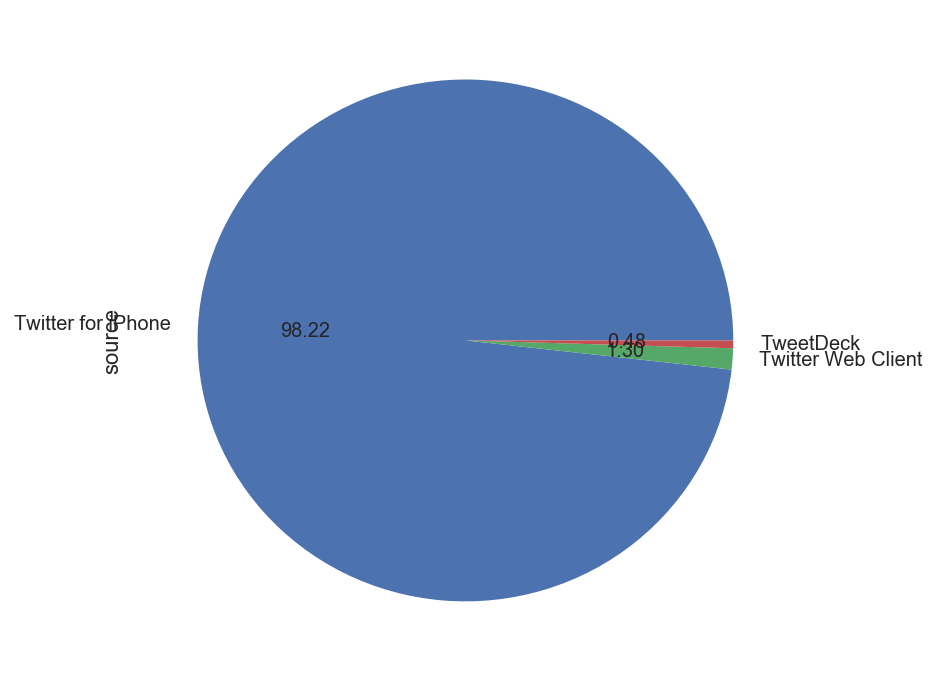

In [79]:
plt.figure(figsize=(6,6))
df['source'].value_counts().plot(kind='pie', autopct='%.2f');

从数据来源中可以看出，98.22%的推特消息来自于移动端（iphone），这从侧面反映出人们的生活越来越离不开手机，至少从社交网络的角度看，移动端占据十分重要的地位。

### 3.2 最受欢迎的狗狗品种

In [80]:
df['p1'].value_counts()[:5]

golden_retriever      138
Labrador_retriever     91
Pembroke               88
Chihuahua              78
pug                    54
Name: p1, dtype: int64

In [81]:
df['p1'].value_counts()[:5] / len(df)

golden_retriever      0.094650
Labrador_retriever    0.062414
Pembroke              0.060357
Chihuahua             0.053498
pug                   0.037037
Name: p1, dtype: float64

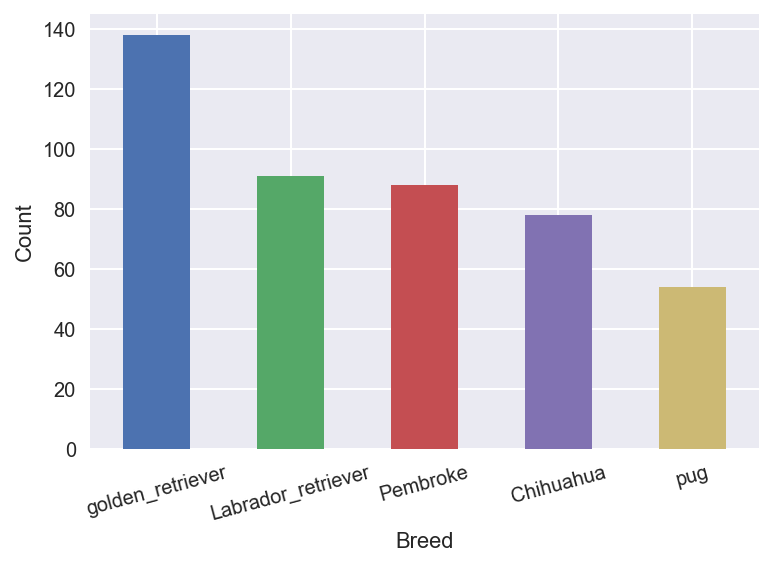

In [82]:
df['p1'].value_counts()[:5].plot(kind='bar')
plt.xlabel('Breed')
plt.xticks(rotation=15)
plt.ylabel('Count');

从推特的数据来看，狗狗数量排名前五的狗狗品种分别是：golden_retriever（金毛猎犬），Labrador_retriever（拉布拉多猎犬），Pembroke（彭布鲁克狗），Chihuahua（吉娃娃），pug（哈巴狗），这五个品种的狗狗养的人数最多，一定程度上说明它们最受欢迎。

### 3.3 评分和转发数的关系，评分和喜爱数的关系

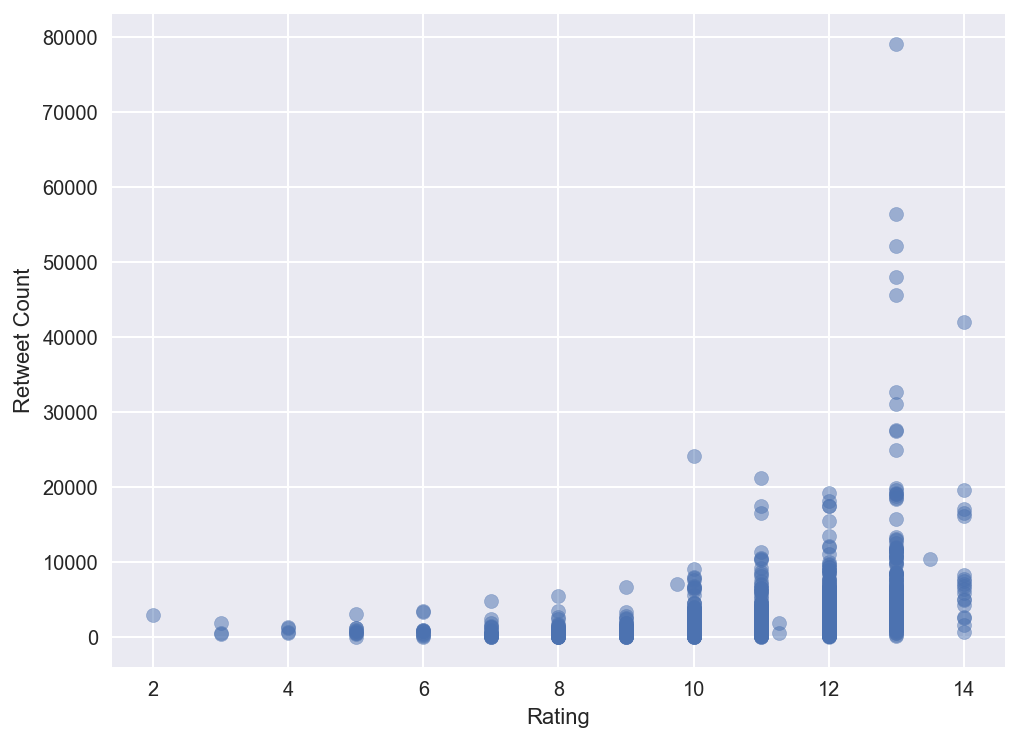

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(df['rating_numerator_fix'], df['retweet_count'], alpha=.5)
plt.xlabel('Rating')
plt.ylabel('Retweet Count');

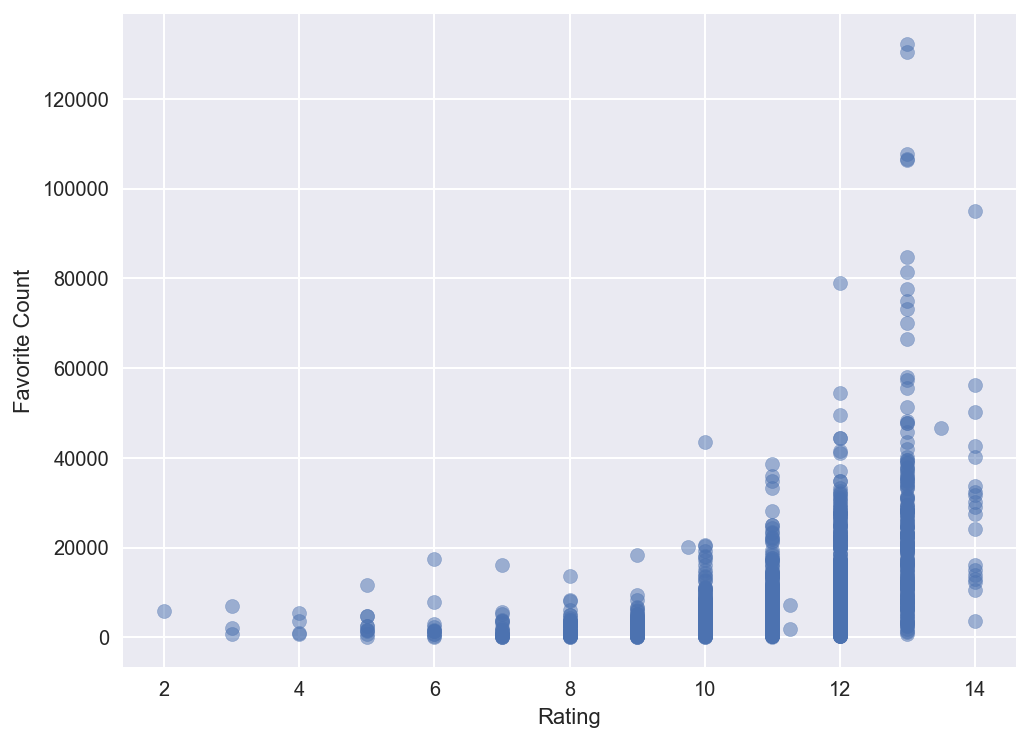

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(df['rating_numerator_fix'], df['favorite_count'], alpha=.5)
plt.xlabel('Rating')
plt.ylabel('Favorite Count');

整体上看，转发数、喜爱数跟评分都呈现正相关；评分越高，转发数量越多，喜爱数越多。

### 3.4 不同stage对应的平均得分

In [85]:
df.groupby('stage')['rating_numerator_fix'].count()

stage
doggo       57
floofer      8
pupper     151
puppo       20
Name: rating_numerator_fix, dtype: int64

In [86]:
df.groupby('stage')['rating_numerator_fix'].mean().sort_values(ascending=False)

stage
puppo      12.050000
doggo      11.912281
floofer    11.875000
pupper     10.962053
Name: rating_numerator_fix, dtype: float64

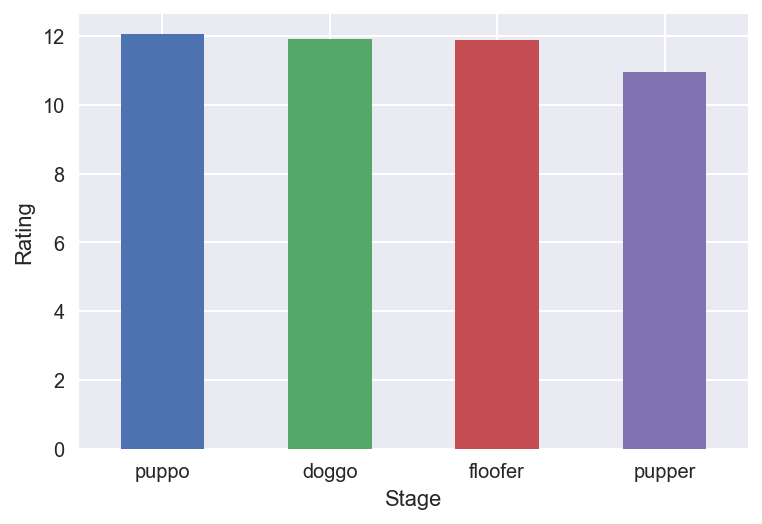

In [87]:
df.groupby('stage')['rating_numerator_fix'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Stage');
plt.ylabel('Rating')
plt.xticks(rotation=0);

stage列数据量太小，可能存在偏差，不适宜在此观测基础上作出结论。

In [88]:
df.head(2)

,tweet_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,rating_numerator_fix,rating_denominator_fix,stage
0,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,33786,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,13.0,10,NaN
1,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,25445,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,12.0,10,NaN


### 3.5 狗狗评分 分布状况

In [89]:
df['rating_numerator_fix'].value_counts()

12.00    383
10.00    318
11.00    306
13.00    210
9.00     106
8.00      58
7.00      24
14.00     19
6.00      12
5.00      10
4.00       4
3.00       3
9.75       1
11.26      1
13.50      1
2.00       1
11.27      1
Name: rating_numerator_fix, dtype: int64

In [90]:
df['rating_numerator_fix'].median()

11.0

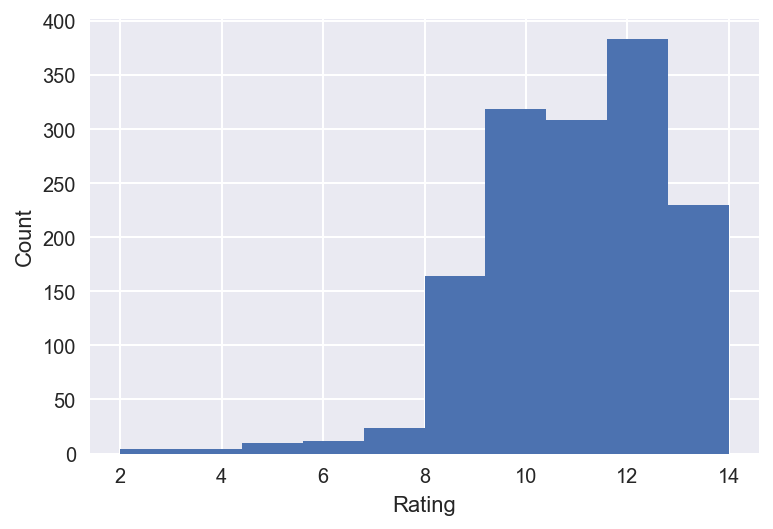

In [91]:
df['rating_numerator_fix'].hist()
plt.xlabel('Rating')
plt.ylabel('Count');

狗狗评分的众数为12，中位数为11，整体呈现左偏态分布。评分满分为10，所以在推主 WeRateDogs 眼中，狗狗都是优秀、可爱、招人喜欢的。

### 3.6 不同狗狗品种对应的平均得分

In [92]:
df.groupby('p1')['rating_numerator_fix'].mean().sort_values(ascending=False)

p1
Saluki                         12.500000
briard                         12.333333
Tibetan_mastiff                12.250000
Border_terrier                 12.142857
standard_schnauzer             12.000000
silky_terrier                  12.000000
Eskimo_dog                     11.777778
Irish_setter                   11.750000
Gordon_setter                  11.750000
Samoyed                        11.700000
golden_retriever               11.641304
chow                           11.609756
Cardigan                       11.529412
giant_schnauzer                11.500000
wire-haired_fox_terrier        11.500000
Australian_terrier             11.500000
Great_Pyrenees                 11.461538
kelpie                         11.454545
Pembroke                       11.443182
Greater_Swiss_Mountain_dog     11.333333
Irish_water_spaniel            11.333333
Norfolk_terrier                11.333333
Leonberg                       11.333333
Siberian_husky                 11.315789
cocker_spanie

In [93]:
df.groupby('p1')['rating_numerator_fix'].mean().describe()

count    111.000000
mean      10.657713
std        0.968974
min        5.000000
25%       10.285714
50%       10.800000
75%       11.225000
max       12.500000
Name: rating_numerator_fix, dtype: float64

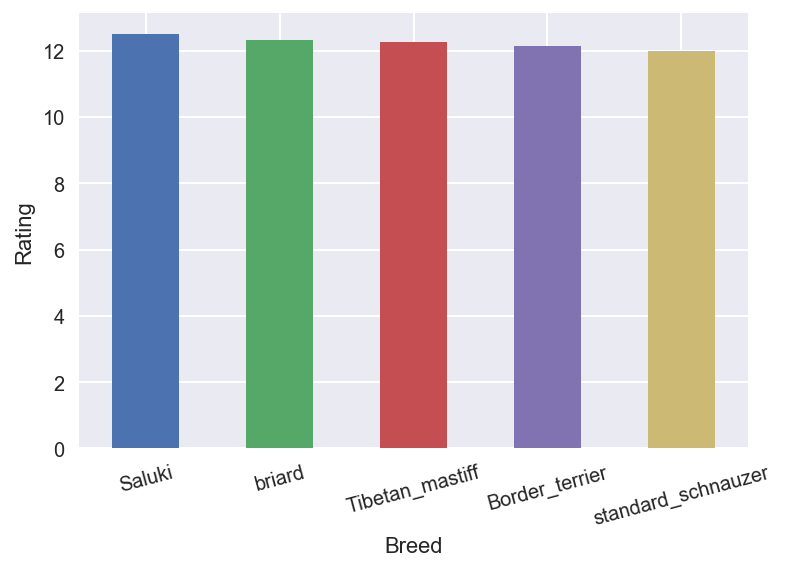

In [94]:
df.groupby('p1')['rating_numerator_fix'].mean().sort_values(ascending=False)[:5].plot(kind='bar')
plt.xlabel('Breed')
plt.ylabel('Rating')
plt.xticks(rotation=15);

根据平均得分，排名前5的狗狗品种分别是：Saluki（萨卢基犬）, briard（布里牧羊犬）, Tibetan_mastiff（藏獒）, Border_terrier（边境梗）, standard_schnauzer（标准雪纳瑞），平均分位于12到12.5之间。